In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

/Users/mturilli/Virtualenvs/RP-PAPER-IPDPS18/lib/python2.7/site-packages/radical/utils/atfork/stdlib_fixer.py:63: UserWarning: logging module already imported before fixup.
  warnings.warn('logging module already imported before fixup.')


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
test_sessions = pd.read_csv('data/tests/sessions.csv', index_col=0)
test_pilots = pd.read_csv('data/tests/pilots.csv', index_col=0)
test_units = pd.read_csv('data/tests/units.csv', index_col=0)

In [3]:
print 'Tests: Total number of successful runs: %s' % test_sessions.shape[0]
print 'Tests: Total number of pilots: %s' % test_pilots.shape[0]
print 'Tests: Total number of units: %s\n' % test_units.shape[0]

Tests: Total number of successful runs: 1
Tests: Total number of pilots: 1
Tests: Total number of units: 1024



# Synapse

## Tests

In [4]:
# Load sessions for Synapse experiment 1
test_sras = load_sessions('/Users/mturilli/Projects/RADICAL/github/experiments/rp-paper-ipdps2018/analysis/data/tests', 
                        test_sessions, 
                        sorted(test_sessions.nunit.unique().tolist()))

Text(0,0.5,u'Number of Units')

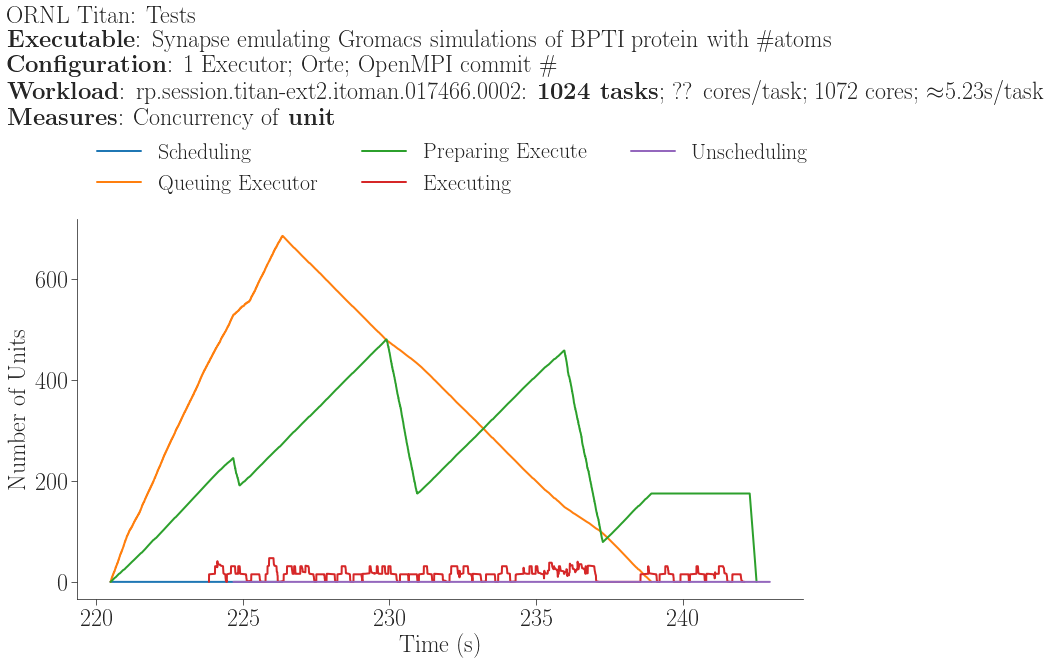

In [5]:
fig, ax  = fig_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$%.2fs/task' % (sid, snunit, sncore, muetime)
title_desc = '\\textbf{Measures}: Concurrency of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.05, y=1.3, horizontalalignment='left')

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                # Preparing Execution stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# # How many units are being held while their directories are being created
# scu = session.concurrency(event=[
#  {ru.STATE: None, ru.EVENT: 'exec_mkdir'},                # Creating Directory start
#  {ru.STATE: None, ru.EVENT: 'exec_mkdir_done'}])          # Creating Directory stop
# x = [item[0] for item in scu]
# y = [item[1] for item in scu]
# ax.plot(x, y) #, color=tableau20[14])

# How many units are being spawned
# scu = session.concurrency(event=[
#  {ru.STATE: None, ru.EVENT: 'exec_start'},                  # Executor Spawning start 
#  {ru.STATE: None, ru.EVENT: 'cu_exec_start'}])              # CU Spawned
# x = [item[0] for item in scu]
# y = [item[1] for item in scu]
# ax.plot(x, y) #, color=tableau20[0])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}]   )                # Executed
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
          labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
                  # 'Checking Directory', 'Spawning', 
                  'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

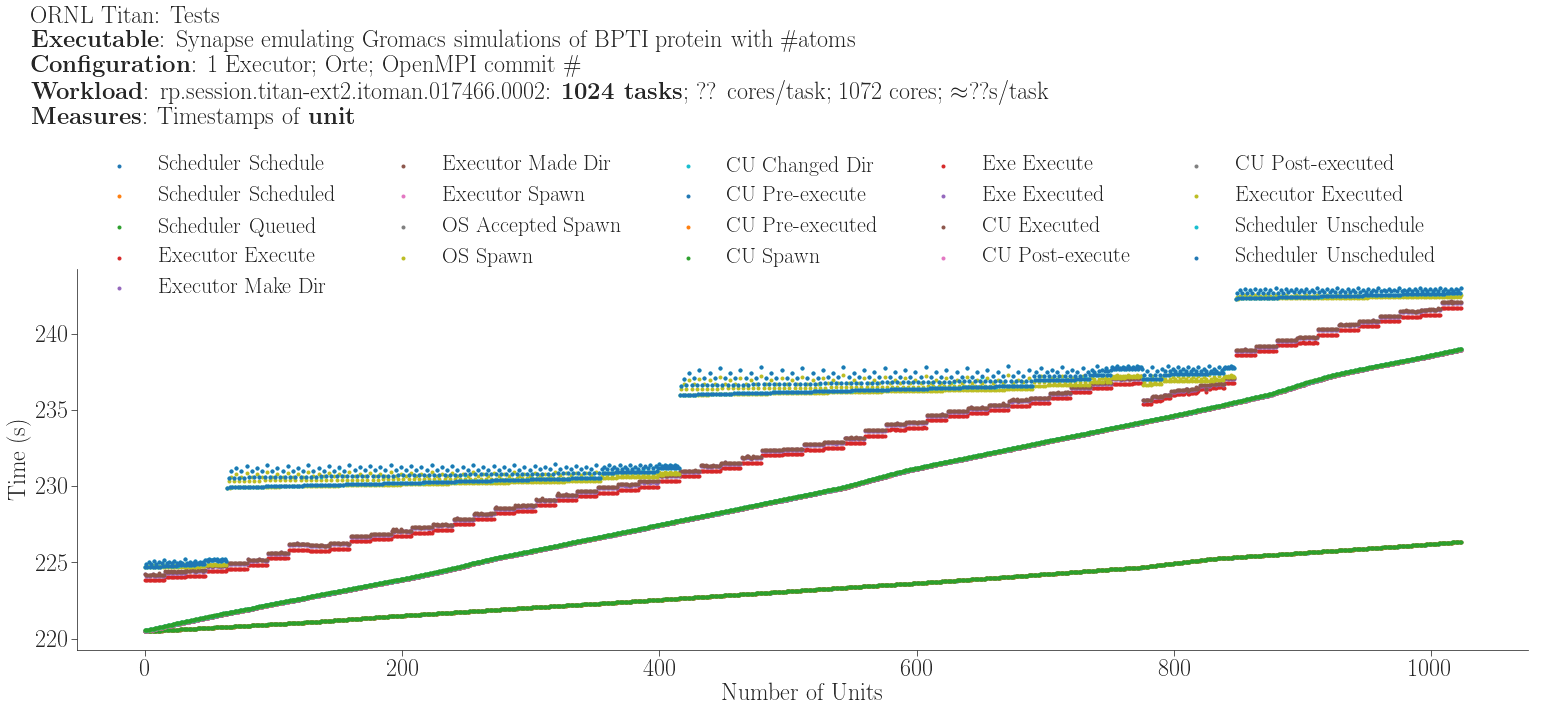

In [6]:
fig, ax  = fig_hdouble_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$??s/task' % (sid, snunit, sncore)#, muetime)
title_desc = '\\textbf{Measures}: Timestamps of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.1, y=1.4, horizontalalignment='left')

# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Scheduled')
df = df.reset_index(drop=True)

plt.scatter(df['Scheduler Schedule'].index   , df['Scheduler Schedule']   , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Scheduled'].index  , df['Scheduler Scheduled']  , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Queued'].index     , df['Scheduler Queued']     , marker='.') # Agent Scheduling Component
plt.scatter(df['Executor Execute'].index     , df['Executor Execute']     , marker='.') # Agent Executing Component
plt.scatter(df['Executor Make Dir'].index    , df['Executor Make Dir']    , marker='.') # Agent Executing Component
plt.scatter(df['Executor Made Dir'].index    , df['Executor Made Dir']    , marker='.') # Agent Executing Component
plt.scatter(df['Executor Spawn'].index       , df['Executor Spawn']       , marker='.') # Agent Executing Component
plt.scatter(df['OS Accepted Spawn'].index    , df['OS Accepted Spawn']    , marker='.') # System OS
plt.scatter(df['OS Spawn'].index             , df['OS Spawn']             , marker='.') # System OS
plt.scatter(df['CU Changed Dir'].index       , df['CU Changed Dir']       , marker='.') # CU script
plt.scatter(df['CU Pre-execute'].index       , df['CU Pre-execute']       , marker='.') # CU script
plt.scatter(df['CU Pre-executed'].index      , df['CU Pre-executed']      , marker='.') # CU script
plt.scatter(df['CU Spawn'].index             , df['CU Spawn']             , marker='.') # CU script [orterun spawner]
plt.scatter(df['Exe Execute'].index          , df['Exe Execute']          , marker='.') # Synapse
plt.scatter(df['Exe Executed'].index         , df['Exe Executed']         , marker='.') # Synapse, orterun [orterun spawner]
plt.scatter(df['CU Executed'].index          , df['CU Executed']          , marker='.') # CU script
plt.scatter(df['CU Post-execute'].index      , df['CU Post-execute']      , marker='.') # CU script
plt.scatter(df['CU Post-executed'].index     , df['CU Post-executed']     , marker='.') # CU script
plt.scatter(df['Executor Executed'].index    , df['Executor Executed']    , marker='.') # Agent Executing Component
plt.scatter(df['Scheduler Unschedule'].index , df['Scheduler Unschedule'] , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Unscheduled'].index, df['Scheduler Unscheduled'], marker='.') # Agent Scheduling Component

plt.legend(ncol=5, loc='upper left', bbox_to_anchor=(0,1.35))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

plt.savefig('figures/titan_tests_unit_events_1024_full.pdf', dpi=300, bbox_inches='tight')

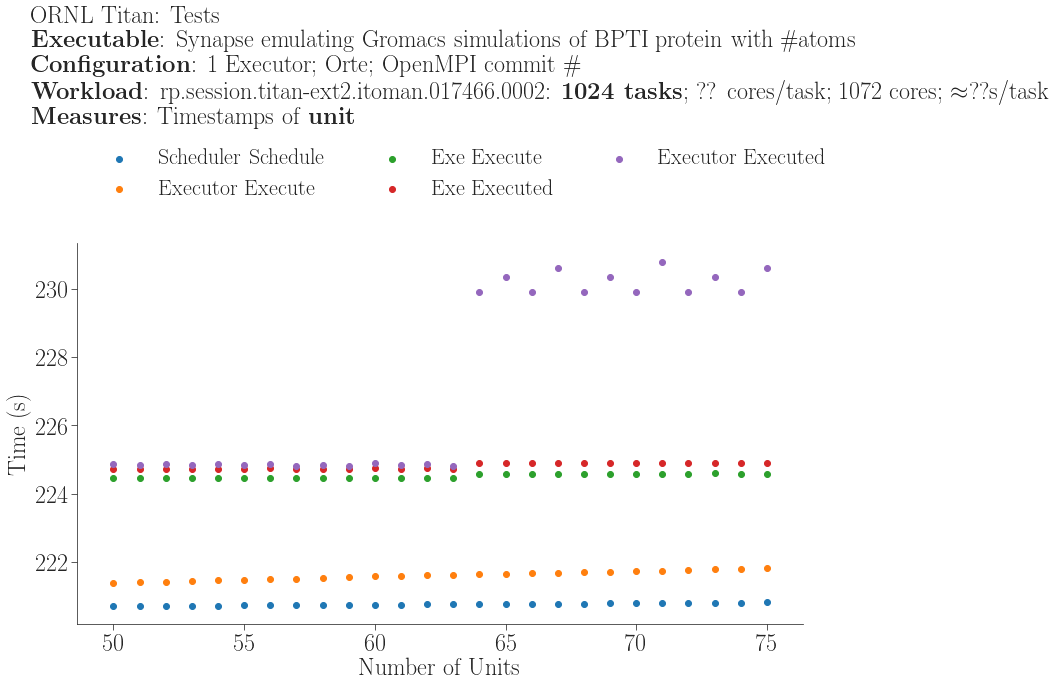

In [7]:
fig, ax = fig_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$??s/task' % (sid, snunit, sncore)#, muetime)
title_desc = '\\textbf{Measures}: Timestamps of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.075, y=1.35, horizontalalignment='left')

df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Scheduled')
df = df.reset_index(drop=True)
df = df.iloc[50:76]

plt.scatter(df['Scheduler Schedule'].index   , df['Scheduler Schedule']   ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Scheduled'].index  , df['Scheduler Scheduled']  ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Queued'].index     , df['Scheduler Queued']     ) # Agent Scheduling Component
plt.scatter(df['Executor Execute'].index     , df['Executor Execute']     ) # Agent Executing Component
# plt.scatter(df['Executor Make Dir'].index    , df['Executor Make Dir']    ) # Agent Executing Component
# plt.scatter(df['Executor Made Dir'].index    , df['Executor Made Dir']    ) # Agent Executing Component
# plt.scatter(df['Executor Spawn'].index       , df['Executor Spawn']       ) # Agent Executing Component
# plt.scatter(df['OS Accepted Spawn'].index    , df['OS Accepted Spawn']    ) # System OS
# plt.scatter(df['OS Spawn'].index             , df['OS Spawn']             ) # System OS
# plt.scatter(df['CU Changed Dir'].index       , df['CU Changed Dir']       ) # CU script
# plt.scatter(df['CU Pre-execute'].index       , df['CU Pre-execute']       ) # CU script
# plt.scatter(df['CU Pre-executed'].index      , df['CU Pre-executed']      ) # CU script
# plt.scatter(df['CU Spawn'].index             , df['CU Spawn']             ) # CU script [orterun spawner]
plt.scatter(df['Exe Execute'].index          , df['Exe Execute']          ) # Synapse
plt.scatter(df['Exe Executed'].index         , df['Exe Executed']         ) # Synapse, orterun [orterun spawner]
# plt.scatter(df['CU Executed'].index          , df['CU Executed']          ) # CU script
# plt.scatter(df['CU Post-execute'].index      , df['CU Post-execute']      ) # CU script
# plt.scatter(df['CU Post-executed'].index     , df['CU Post-executed']     ) # CU script
plt.scatter(df['Executor Executed'].index    , df['Executor Executed']    ) # Agent Executing Component
# plt.scatter(df['Scheduler Unschedule'].index , df['Scheduler Unschedule'] ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Unscheduled'].index, df['Scheduler Unscheduled']) # Agent Scheduling Component

plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.3))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

plt.savefig('figures/titan_tests_unit_events_1024_stall_a.pdf', dpi=300, bbox_inches='tight')

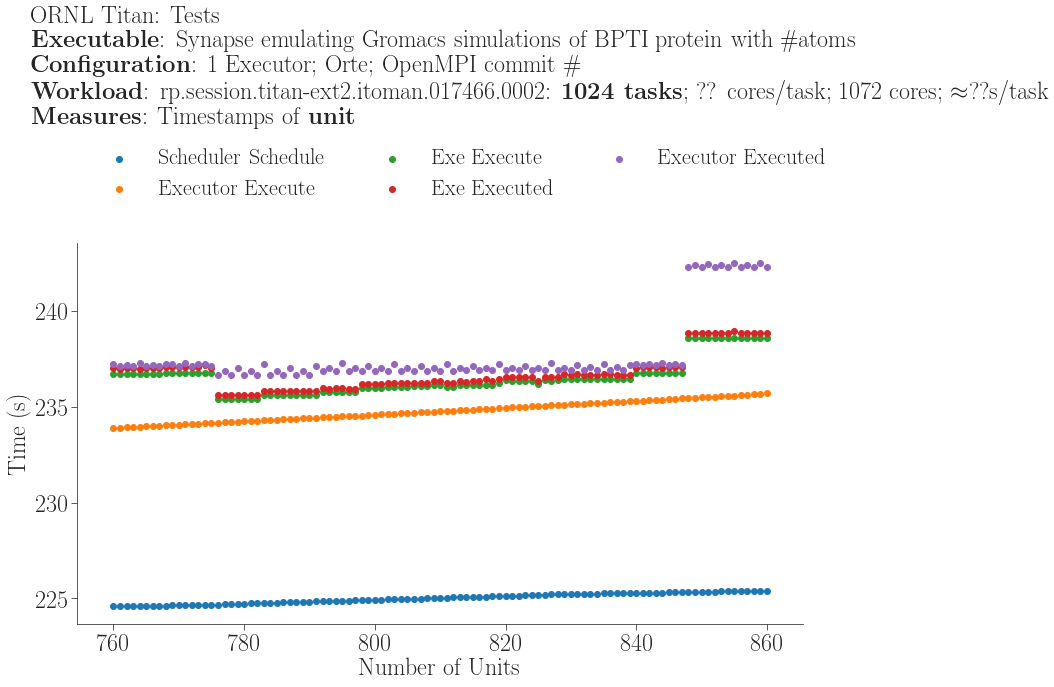

In [8]:
fig, ax = fig_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$??s/task' % (sid, snunit, sncore)#, muetime)
title_desc = '\\textbf{Measures}: Timestamps of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.075, y=1.35, horizontalalignment='left')

df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Scheduled')
df = df.reset_index(drop=True)
df = df.iloc[760:861]

plt.scatter(df['Scheduler Schedule'].index   , df['Scheduler Schedule']   ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Scheduled'].index  , df['Scheduler Scheduled']  ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Queued'].index     , df['Scheduler Queued']     ) # Agent Scheduling Component
plt.scatter(df['Executor Execute'].index     , df['Executor Execute']     ) # Agent Executing Component
# plt.scatter(df['Executor Make Dir'].index    , df['Executor Make Dir']    ) # Agent Executing Component
# plt.scatter(df['Executor Made Dir'].index    , df['Executor Made Dir']    ) # Agent Executing Component
# plt.scatter(df['Executor Spawn'].index       , df['Executor Spawn']       ) # Agent Executing Component
# plt.scatter(df['OS Accepted Spawn'].index    , df['OS Accepted Spawn']    ) # System OS
# plt.scatter(df['OS Spawn'].index             , df['OS Spawn']             ) # System OS
# plt.scatter(df['CU Changed Dir'].index       , df['CU Changed Dir']       ) # CU script
# plt.scatter(df['CU Pre-execute'].index       , df['CU Pre-execute']       ) # CU script
# plt.scatter(df['CU Pre-executed'].index      , df['CU Pre-executed']      ) # CU script
# plt.scatter(df['CU Spawn'].index             , df['CU Spawn']             ) # CU script [orterun spawner]
plt.scatter(df['Exe Execute'].index          , df['Exe Execute']          ) # Synapse
plt.scatter(df['Exe Executed'].index         , df['Exe Executed']         ) # Synapse, orterun [orterun spawner]
# plt.scatter(df['CU Executed'].index          , df['CU Executed']          ) # CU script
# plt.scatter(df['CU Post-execute'].index      , df['CU Post-execute']      ) # CU script
# plt.scatter(df['CU Post-executed'].index     , df['CU Post-executed']     ) # CU script
plt.scatter(df['Executor Executed'].index    , df['Executor Executed']    ) # Agent Executing Component
# plt.scatter(df['Scheduler Unschedule'].index , df['Scheduler Unschedule'] ) # Agent Scheduling Component
# plt.scatter(df['Scheduler Unscheduled'].index, df['Scheduler Unscheduled']) # Agent Scheduling Component

plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.3))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

plt.savefig('figures/titan_tests_unit_events_1024_stall_b.png', dpi=300, bbox_inches='tight')

In [9]:
session = test_sras[1024][0]
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Scheduled')
df = df.reset_index(drop=True)
df.iloc[63:65][[
    'uid'                   ,
#     'Scheduler Schedule'    ,
#     'Scheduler Scheduled'   ,
#     'Scheduler Queued'      ,
#     'Executor Execute'      ,
#     'Executor Make Dir'     ,
#     'Executor Made Dir'     ,
#     'Executor Spawn'        ,
#     'OS Accepted Spawn'     ,
#     'OS Spawn'              ,
#     'CU Changed Dir'        ,
#     'CU Pre-execute'        ,
#     'CU Pre-executed'       ,
#     'CU Spawn'              ,
#     'Exe Execute'           ,
#     'Exe Executed'          ,
#     'CU Executed'           ,
#     'CU Post-execute'       ,
#     'CU Post-executed'      ,
#     'Executor Executed'     ,
#     'Scheduler Unschedule'  ,
#     'Scheduler Unscheduled' ,    
    'Scheduler Scheduling'  ,  
    'Scheduler Queuing Executor',
    'Executor Pre-executing'   ,
    'Executor Making Dir'      ,
    'Executor Spawning'        ,
    'OS Spawning'              ,
    'CU Changing Dir'          ,
    'CU Pre-executing'         ,
    'CU Spawning'              ,
    'Exe Executing'            ,
    'Scheduler Unscheduling',
    ]]

,uid,Scheduler Scheduling,Scheduler Queuing Executor,Executor Pre-executing,Executor Making Dir,Executor Spawning,OS Spawning,CU Changing Dir,CU Pre-executing,CU Spawning,Exe Executing,Scheduler Unscheduling
63,unit.000157,0.0002,0.8590,0.0074,0.0008,0.0072,0.0258,0.0057,NaN,2.7697,0.2885,0.0011
64,unit.000062,0.0002,0.8709,0.0071,0.0007,0.0069,0.0271,0.0059,NaN,2.8928,0.3073,0.0016
